In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sns.set_style('whitegrid')

In [4]:
raw_df = pd.read_excel('https://github.com/chris1610/pbpython/blob/master/data/2018_Sales_Total_v2.xlsx?raw=true')
df = raw_df.groupby(['account number', 'name'])['ext price'].sum().reset_index()

In [8]:
raw_df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2018-01-01 07:21:51.000002
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2018-01-01 10:00:47.000004
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2018-01-01 13:24:57.999997
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2018-01-01 15:05:21.999995
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2018-01-01 23:26:55.000003


In [6]:
df.head()

,account number,name,ext price
0,141962,Herman LLC,63626.03
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92


<AxesSubplot:ylabel='Frequency'>

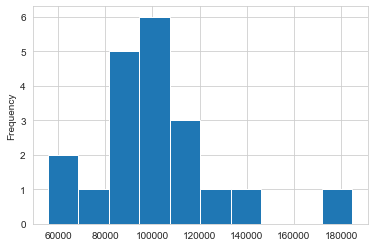

In [7]:
df['ext price'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

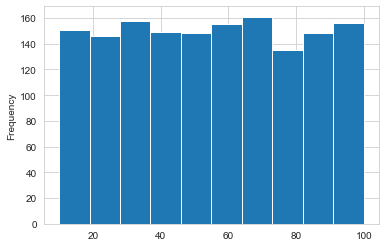

In [9]:
raw_df['unit price'].plot(kind='hist')

In [10]:
pd.qcut(df['ext price'], q = 4)

0     (55733.049000000006, 89137.708]
1             (89137.708, 100271.535]
2     (55733.049000000006, 89137.708]
3              (110132.552, 184793.7]
4             (89137.708, 100271.535]
5             (89137.708, 100271.535]
6     (55733.049000000006, 89137.708]
7            (100271.535, 110132.552]
8              (110132.552, 184793.7]
9              (110132.552, 184793.7]
10            (89137.708, 100271.535]
11    (55733.049000000006, 89137.708]
12    (55733.049000000006, 89137.708]
13            (89137.708, 100271.535]
14           (100271.535, 110132.552]
15             (110132.552, 184793.7]
16           (100271.535, 110132.552]
17             (110132.552, 184793.7]
18           (100271.535, 110132.552]
19           (100271.535, 110132.552]
Name: ext price, dtype: category
Categories (4, interval[float64, right]): [(55733.049000000006, 89137.708] < (89137.708, 100271.535] < (100271.535, 110132.552] < (110132.552, 184793.7]]

In [11]:
pd.qcut(df['ext price'], q = 6)

0     (55733.049000000006, 86600.422]
1             (91241.493, 100271.535]
2     (55733.049000000006, 86600.422]
3              (112528.643, 184793.7]
4             (91241.493, 100271.535]
5              (86600.422, 91241.493]
6     (55733.049000000006, 86600.422]
7             (104178.58, 112528.643]
8              (112528.643, 184793.7]
9              (112528.643, 184793.7]
10            (91241.493, 100271.535]
11    (55733.049000000006, 86600.422]
12             (86600.422, 91241.493]
13             (86600.422, 91241.493]
14            (100271.535, 104178.58]
15             (112528.643, 184793.7]
16            (100271.535, 104178.58]
17            (104178.58, 112528.643]
18            (104178.58, 112528.643]
19            (100271.535, 104178.58]
Name: ext price, dtype: category
Categories (6, interval[float64, right]): [(55733.049000000006, 86600.422] < (86600.422, 91241.493] < (91241.493, 100271.535] < (100271.535, 104178.58] < (104178.58, 112528.643] < (112528.643, 184793.7]]

In [12]:
df['quantile_ex_1'] = pd.qcut(df['ext price'], q=4 )
df['quantile_ex_2'] = pd.qcut(df['ext price'], q=10, precision=0 )

In [13]:
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]"
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]"
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]"
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]"
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]"


In [14]:
df['quantile_ex_1'].value_counts()

(55733.049000000006, 89137.708]    5
(89137.708, 100271.535]            5
(100271.535, 110132.552]           5
(110132.552, 184793.7]             5
Name: quantile_ex_1, dtype: int64

In [15]:
df['quantile_ex_2'].value_counts()

(55732.0, 76471.0]      2
(76471.0, 87168.0]      2
(87168.0, 90686.0]      2
(90686.0, 95908.0]      2
(95908.0, 100272.0]     2
(100272.0, 103606.0]    2
(103606.0, 105938.0]    2
(105938.0, 112290.0]    2
(112290.0, 124778.0]    2
(124778.0, 184794.0]    2
Name: quantile_ex_2, dtype: int64

In [20]:
bin_label_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df['quantile_ex_3'] = pd.qcut(df['ext price'], q = [0, .2, .4, .6, .8, 1], labels = bin_label_5)
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",Bronze
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Bronze
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver


In [21]:

#equal frequency binning
def equifreq(arr1, m):
    
    a = len(arr1)
    n = int( a / m)
    for i in range(0,m):
        arr = []
        for j in range(i * n, (i + 1) * n):
            if j >= a:
                break
            arr = arr + [arr1[j]]
        print(arr)
        
        


In [22]:
ex = [5,10,11,13,15,35,50,55,72,92,204,215]
equifreq(ex,3)

[5, 10, 11, 13]
[15, 35, 50, 55]
[72, 92, 204, 215]


In [34]:
#equal width binning

def equiwidth(arr1, m):
    
    a = len(arr1)
    w = int((max(arr1)- min(arr1)) / m)
    
    min1 = min(arr1)
    arr = []
    for i in range(0, m+1):
        arr = arr+ [min1 + w * i]
    arri = []
        
    for i in range(0, m):
        temp = []
        for j in arr1:
            if j >= arr[i] and j <= arr[i+1]:
                temp += [j]
        arri += [temp]
    print(arri)

In [38]:
equiwidth(ex,3)

[[5, 10, 11, 13, 15, 35, 50, 55, 72], [92], [204, 215]]


In [43]:
m = 3 
arr1 = [5,10,11,13,15,35,50,55,72,92,204,215]
a = len(arr1)
w = int((max(arr1)- min(arr1)) / m)
arr = []
min1 = min(arr1)
for i in range(0, m+1):
    arr = arr+ [min1 + w * i]
arri = []

In [45]:
arr

[5, 75, 145, 215]